<a href="https://colab.research.google.com/github/PriyankaGona/MachineLearning-Assignments/blob/master/hw2_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Required headers and libraries are imported
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
# Required variables are declared
batch_size = 32
num_classes = 10
epochs = 100

#Loading and shuffling Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, y_train = shuffle(x_train, y_train, random_state=0)


split_index = int(0.8 * x_train.shape[0])


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# Dividing data into training and validation sets
train_x = x_train[:split_index]
train_y = y_train[:split_index]

validate_x = x_train[split_index:]
validate_y = y_train[split_index:]

print("\nnumber of samples in training set: ",len(train_x))
print("number of samples in validation set: ",len(validate_x))

input_shape = train_x.shape[1:]
print("Shape of images: ",input_shape)

170500096/170498071 [==============================] - 95s 1us/step

number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)


In [0]:
# Defined the model
#def getModel(input_shape):
  
	#model = Sequential()
  #model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  #model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
	#model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.25))

	#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  #model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.25))

	#model.add(Flatten())
  #model.add(Dense(512, activation='relu'))
  #model.add(Dropout(0.5))
  #model.add(Dense(num_classes, activation='softmax'))

	#model.summary()
	#model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
	
  #return model

In [0]:
#Both the commented and executed model gave the same accuracy with slight difference.
def getModel(input_shape):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
  return model

In [0]:
def train_model(model):
  # Data Augmentation
	datagen = ImageDataGenerator(rotation_range=0, width_shift_range=0.1,height_shift_range=0.1,fill_mode='nearest', horizontal_flip=True, vertical_flip=False, rescale=None)

	datagen.fit(train_x)

	for e in range(10):
		batches = 0
		for x_batch, y_batch in datagen.flow(train_x, train_y, batch_size=40000):
			model.fit(x_batch, y_batch)
			batches += 1
			if batches >= 1:
				# we need to break the loop by hand because
				# the generator loops indefinitely
				break
				
				
	return model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(validate_x, validate_y))

In [0]:
# Model is tested in this method
def test_model():
	
	score = model.evaluate(validate_x, validate_y, verbose=0)
	
	print('\n\nTest loss:', score[0])
	print('Test accuracy:', score[1])

In [0]:
#Plotted the accuracy against number of epochs
def plot_training_graph(training_history):
	
	plotaccuracy = plt.plot(range(1,epochs+1), training_history.history['acc'],range(1,epochs+1), training_history.history['val_acc'])

	plt.xlabel('Number of epochs')
	plt.ylabel('Accuracy')

	plt.legend(('Train Accuracy','Test Accuracy'))

	plt.show(plotaccuracy)

	print('\n\nvalidation loss:', training_history.history['val_loss'][-1])
	print('validation accuracy:', training_history.history['val_acc'][-1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 24s 597us/step - loss: 1.9013 - acc: 0.2878
Epoch 1/1
40000/40000 [==============================] - 20s 492us/step - loss: 1.5863 - acc: 0.4129
Epoch 1/1
40000/40000 [==============================] - 23s 585us/step - loss: 1.4565 - acc: 0.4667
Epoch 1/1
40000/40000 [==============================] - 19s 468us/step - loss: 1.3616 - acc: 0.5058
Epoch 1/1
40000/40000 [==============================] - 23s 581us/step - loss: 1.2870 - acc: 0.5363
Epoch 1/1
40000/40000 [==============================] - 19s 471us/step - loss: 1.2348 - acc: 0.5585
Epoch 1/1
40000/40000 [==============================] - 18s 457us/step - loss: 1.1842 - acc: 0.5762
Epoch 1/1
40000/40000 [==============================] - 2

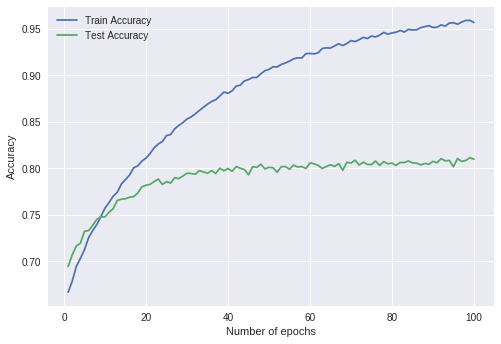



validation loss: 0.7576512030959129
validation accuracy: 0.8097


In [8]:
# Calling all the models
model = getModel(input_shape)
History = train_model(model)
test_model()

plot_training_graph(History)